In [1]:
!pip install matplotlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
import os
import random
import numpy as np
import tensorflow as tf
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


2023-07-03 21:42:20.896758: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 21:42:21.077130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 21:42:21.078243: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 21:42:22.525786: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [27]:

train_path='./datasets/Nutrient Deficient RAW Images of Banana Leaves'
test_path='./datasets/Augmented Images of Nutrient Deficient Banana leaves'

In [28]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(256, 256),
                         classes=['boron', 'healthy', 'iron', 'magnesium', 'manganese', 'calcium', 'potassium', 'sulphur', 'zinc'],
                         batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(256, 256),
                         classes=['boron', 'healthy', 'iron', 'magnesium', 'manganese', 'calcium', 'potassium', 'sulphur', 'zinc'],
                         batch_size=10, shuffle=False)

Found 3100 images belonging to 9 classes.
Found 7500 images belonging to 9 classes.


In [33]:
model=Sequential([#data_augmentation,
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPool2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(units=9,activation='softmax')
])

In [34]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 128)     

In [35]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(x=train_batches, validation_data=train_batches,epochs=15)

Epoch 1/15


2023-07-03 22:13:20.249897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


310/310 [==============================] - ETA: 0s - loss: 1.5931 - accuracy: 0.4239

2023-07-03 22:15:16.727438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


310/310 [==============================] - 139s 444ms/step - loss: 1.5931 - accuracy: 0.4239 - val_loss: 1.4140 - val_accuracy: 0.4906
Epoch 2/15
310/310 [==============================] - 138s 445ms/step - loss: 1.4032 - accuracy: 0.4713 - val_loss: 1.2700 - val_accuracy: 0.5445
Epoch 3/15
310/310 [==============================] - 139s 448ms/step - loss: 1.2724 - accuracy: 0.5223 - val_loss: 1.1024 - val_accuracy: 0.5842
Epoch 4/15
310/310 [==============================] - 132s 427ms/step - loss: 1.1198 - accuracy: 0.5819 - val_loss: 0.9111 - val_accuracy: 0.6684
Epoch 5/15
310/310 [==============================] - 137s 442ms/step - loss: 0.9500 - accuracy: 0.6355 - val_loss: 0.7364 - val_accuracy: 0.7523
Epoch 6/15
310/310 [==============================] - 123s 398ms/step - loss: 0.7764 - accuracy: 0.7142 - val_loss: 0.5816 - val_accuracy: 0.8268
Epoch 7/15
310/310 [==============================] - 124s 399ms/step - loss: 0.6435 - accuracy: 0.7700 - val_loss: 0.4414 - val_accura

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

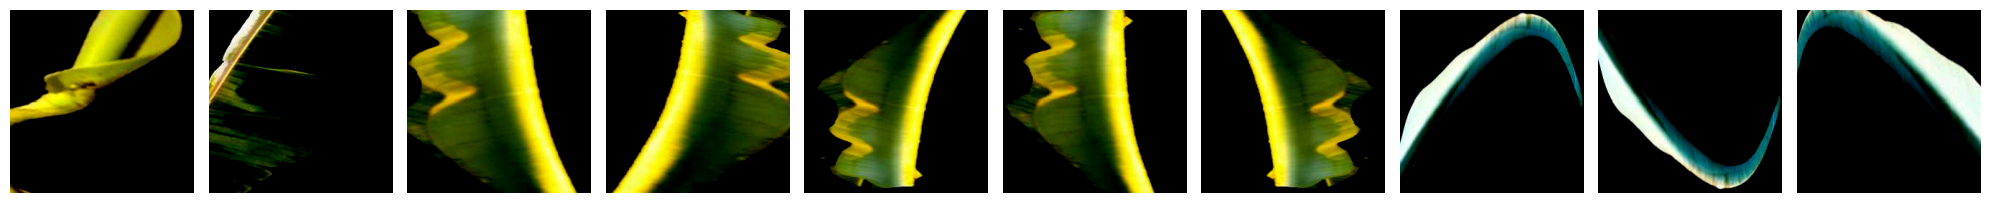

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [37]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [38]:
test_batches.classes

array([0, 0, 0, ..., 8, 8, 8], dtype=int32)

In [ ]:
predictions=model.predict(x=test_batches, verbose=0)


2023-07-03 22:47:45.837788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [13]:
np.round(predictions)

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [14]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
test_batches.class_indices

{'boron': 0, 'healthy': 1, 'iron': 2, 'magnesium': 3}

Confusion matrix, without normalization
[[489 206  53  52]
 [  0 950   0   0]
 [113 148 429 170]
 [103 250 173 274]]


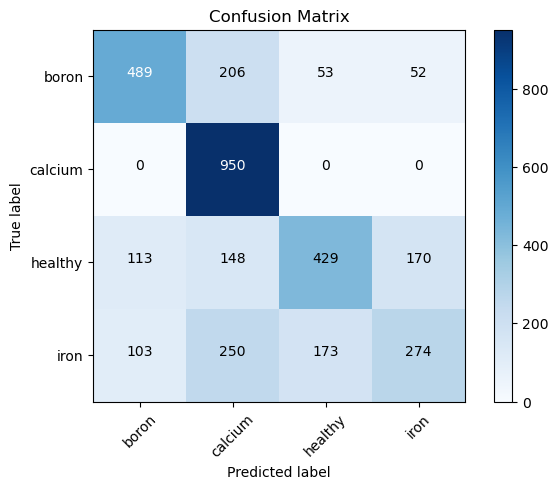

In [18]:
cm_plot_labels = ['boron','calcium', 'healthy','iron']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')